# CS184A Homework 1
Jiachen Sun 001093798

### Problem 1: Python & Data Exploration


In [88]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [89]:
iris = np.genfromtxt("data/iris.txt", delimiter=None)
Y = iris[:, -1]
X = iris[:, 0:-1]
print(X.shape)

(148, 4)


\# of observations is 148, # of features is 4.

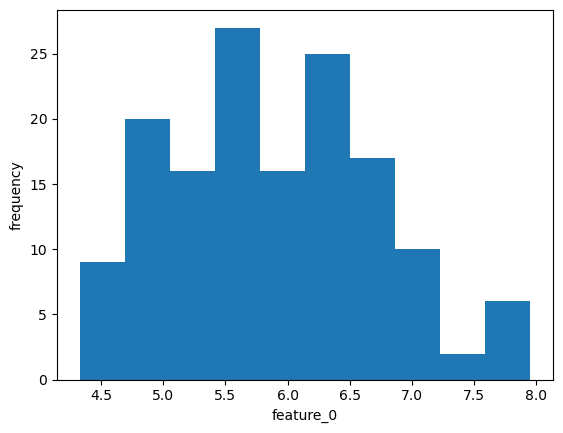

In [90]:
plt.hist(X[:, 0])
plt.xlabel('feature_0')
plt.ylabel('frequency')
plt.show()

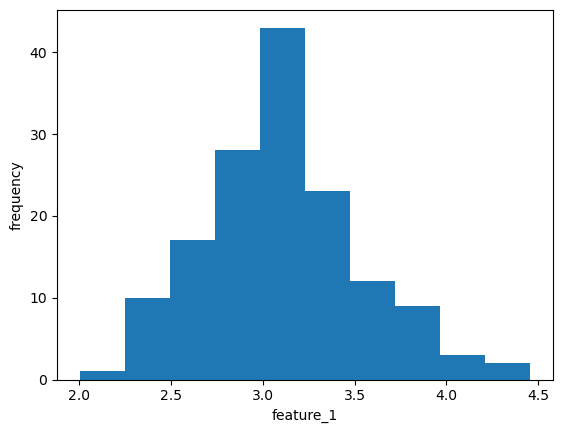

In [91]:
plt.hist(X[:, 1])
plt.xlabel('feature_1')
plt.ylabel('frequency')
plt.show()

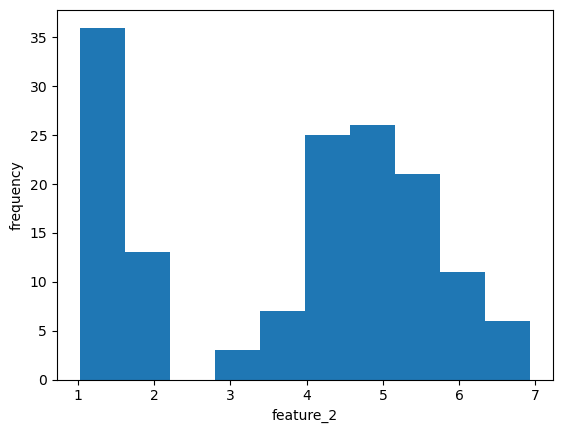

In [92]:
plt.hist(X[:, 2])
plt.xlabel('feature_2')
plt.ylabel('frequency')
plt.show()

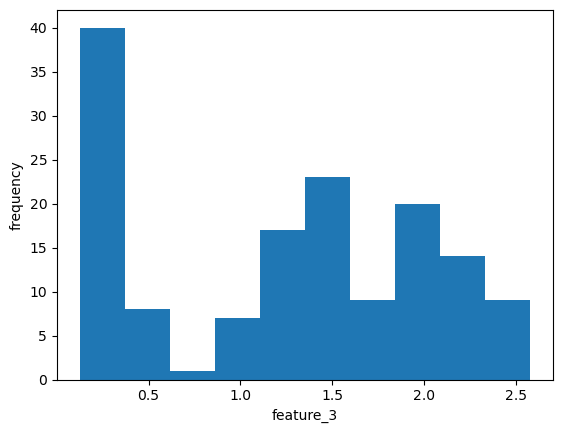

In [93]:
plt.hist(X[:, 3])
plt.xlabel('feature_3')
plt.ylabel('frequency')
plt.show()

In [94]:
print('Statistics for feature 0: ', np.round(np.mean(X[:, 0]), 3), np.round(np.std(X[:, 0]), 3))
print('Statistics for feature 1: ', np.round(np.mean(X[:, 1]), 3), np.round(np.std(X[:, 1]), 3))
print('Statistics for feature 2: ', np.round(np.mean(X[:, 2]), 3), np.round(np.std(X[:, 2]), 3))
print('Statistics for feature 3: ', np.round(np.mean(X[:, 3]), 3), np.round(np.std(X[:, 3]), 3))

Statistics for feature 0:  5.9 0.833
Statistics for feature 1:  3.099 0.436
Statistics for feature 2:  3.82 1.754
Statistics for feature 3:  1.253 0.759


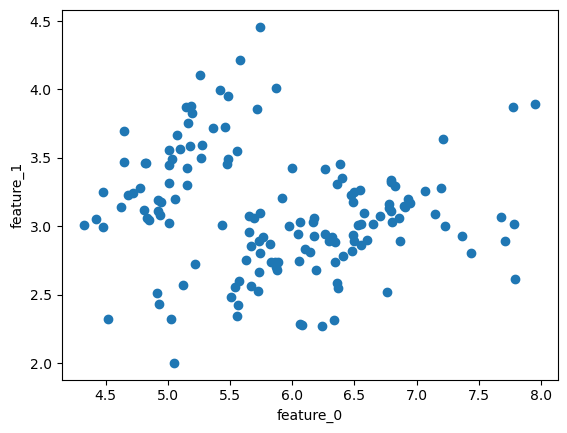

In [95]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('feature_0')
plt.ylabel('feature_1')
plt.show()

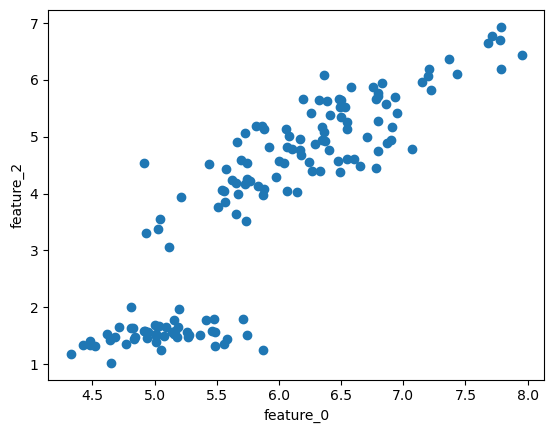

In [96]:
plt.scatter(X[:, 0], X[:, 2])
plt.xlabel('feature_0')
plt.ylabel('feature_2')
plt.show()

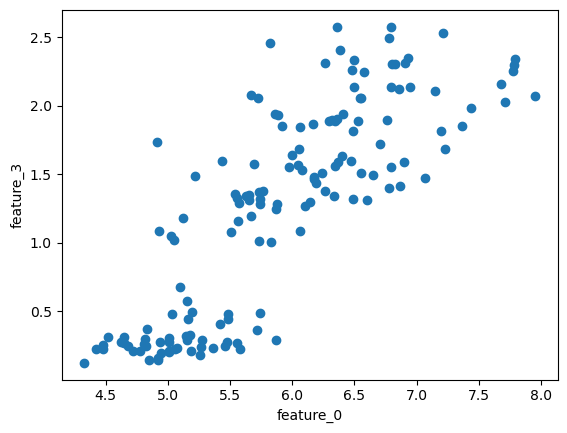

In [97]:
plt.scatter(X[:, 0], X[:, 3])
plt.xlabel('feature_0')
plt.ylabel('feature_3')
plt.show()

### Problem 2: kNN predictions

In [98]:
import mltools as ml

X, Y = ml.shuffleData(X, Y)
Xtr, Xva, Ytr, Yva = ml.splitData(X[:, 0:2], Y, 0.75)
knn = ml.knn.knnClassify()

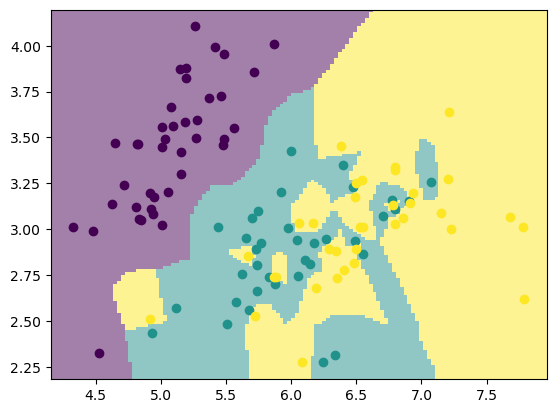

In [99]:
knn.train(Xtr, Ytr, 1)
YvaHat = knn.predict(Xva)
ml.plotClassify2D(knn, Xtr, Ytr)

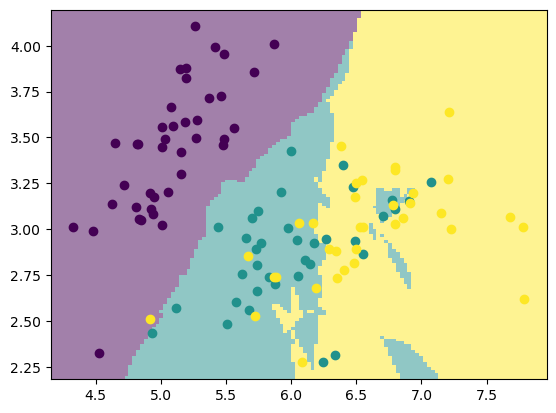

In [100]:
knn.train(Xtr, Ytr, 5)
YvaHat = knn.predict(Xva)
ml.plotClassify2D(knn, Xtr, Ytr)

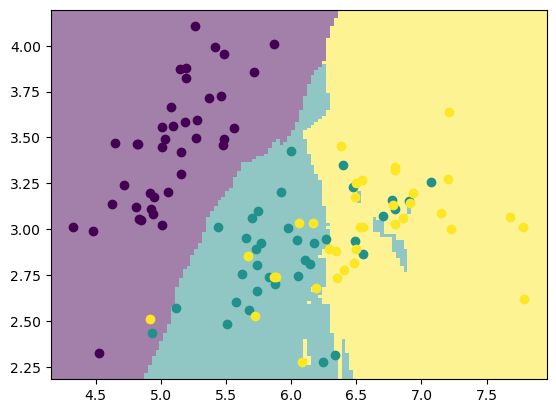

In [101]:
knn.train(Xtr, Ytr, 10)
YvaHat = knn.predict(Xva)
ml.plotClassify2D(knn, Xtr, Ytr)

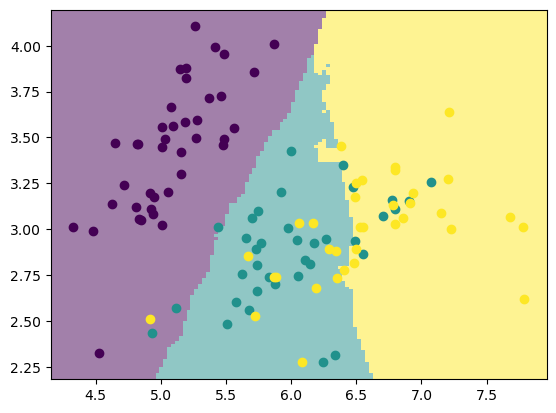

In [102]:
knn.train(Xtr, Ytr, 50)
YvaHat = knn.predict(Xva)
ml.plotClassify2D(knn, Xtr, Ytr)

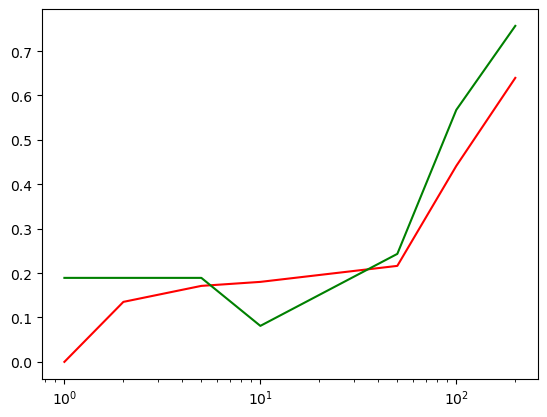

In [103]:
K = [1, 2, 5, 10, 50, 100, 200];
errTrain = np.zeros(shape=len(K))
errValid = np.zeros(shape=len(K))


for i, k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr, Ytr, k)  # TODO: complete code to train model
    Yhat = learner.predict(Xtr)  # TODO: predict results on training data
    errTrain[i] = np.count_nonzero(Yhat != Ytr) / len(Yhat)
    Yhat = learner.predict(Xva)
    errValid[i] = np.count_nonzero(Yhat != Yva) / len(Yhat)

plt.semilogx(K, errTrain, color='r')
plt.semilogx(K, errValid, color='g')

I recommended k=10, because it produces the lowest validation error.

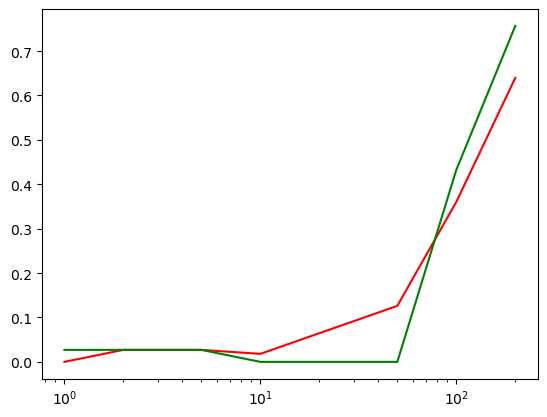

In [104]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.75)

K = [1, 2, 5, 10, 50, 100, 200];
errTrain = np.zeros(shape=len(K))
errValid = np.zeros(shape=len(K))

for i, k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr, Ytr, k)  # TODO: complete code to train model
    Yhat = learner.predict(Xtr)  # TODO: predict results on training data
    errTrain[i] = np.count_nonzero(Yhat != Ytr) / len(Yhat)
    Yhat = learner.predict(Xva)
    errValid[i] = np.count_nonzero(Yhat != Yva) / len(Yhat)

plt.semilogx(K, errTrain, color='r')
plt.semilogx(K, errValid, color='g')

The plots are similar, when k is very large, both training and validation errors increased. The recommendation is still k=10 since it has both reasonable training and validation errors.

### Statement of Collaboration
This homework was done completely by Jiachen Sun.